# Dados não estruturados II:

- Introdução a NLP e pré-processamento de textos;
- Bag of Words;
- Modelos probabilísticos;
- Word Embedding;

\\


### Exceto a primeira aula, todas as aulas terão exercícios e correções dos mesmos, além do conteúdo. 

### Nas sextas-feiras, ereceberão um arquivo .ipynb para ser entregue no começo da semana, com um problema pratico






# Projeto:

## Análise de sentimento do twitter

link para a base: [`twitter`](https://www.kaggle.com/code/akshayarajasekaran/cd-sentiment-analysis-of-tweets/data)



In [44]:
# pré processamento

# nltk, spacy, Wordcloud, re, unidecode

frase = 'Olá ! Esse é o meu primeiro dia na aula de DNEII'

#stopwords

import nltk

#nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

In [6]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [7]:
# tokenização

tokens = [t for t in frase.split()]

print(tokens)

['Olá', '!', 'Esse', 'é', 'o', 'meu', 'primeiro', 'dia', 'na', 'aula', 'de', 'DNEII']


In [8]:
clean_tokens =[]
stop_tokens = []

for token in tokens:
  if token in stopwords:
    stop_tokens.append(token)

for token in tokens:
  if token not in stopwords:
    clean_tokens.append(token)

In [9]:
print(clean_tokens)
print()
print(stop_tokens)

['Olá', '!', 'Esse', 'primeiro', 'dia', 'aula', 'DNEII']

['é', 'o', 'meu', 'na', 'de']


In [10]:
frase_limpa = " ".join(clean_tokens)

print(frase_limpa)

Olá ! Esse primeiro dia aula DNEII


In [11]:
print(frase_limpa.lower())

olá ! esse primeiro dia aula dneii


In [12]:
import re
 
frase2 = 'Ganhei 1000 reais em prêmios!!! #goodday #estoucomsorte'

frase2_sn = re.sub(r'\d', '', frase2)

print(frase2)
print()
print(frase2_sn)


Ganhei 1000 reais em prêmios!!! #goodday #estoucomsorte

Ganhei  reais em prêmios!!! #goodday #estoucomsorte


In [13]:
frase2_sce = re.sub(r'[^a-zA-Z]+', ' ', frase2)

print(frase2)
print()
print(frase2_sce)

Ganhei 1000 reais em prêmios!!! #goodday #estoucomsorte

Ganhei reais em pr mios goodday estoucomsorte


In [18]:
import unidecode
# from unidecode import unidecode

frase2_sa = unidecode.unidecode(frase2)

print(frase2)
print()
print(frase2_sa)

Ganhei 1000 reais em prêmios!!! #goodday #estoucomsorte

Ganhei 1000 reais em premios!!! #goodday #estoucomsorte


In [22]:
from nltk.tokenize import word_tokenize, sent_tokenize


words = word_tokenize(frase2)
sent = sent_tokenize(frase2)

print(frase2)
print()
print(words)
print()
print(sent)

Ganhei 1000 reais em prêmios!!! #goodday #estoucomsorte

['Ganhei', '1000', 'reais', 'em', 'prêmios', '!', '!', '!', '#', 'goodday', '#', 'estoucomsorte']

['Ganhei 1000 reais em prêmios!!!', '#goodday #estoucomsorte']


In [23]:
from bs4 import BeautifulSoup
import urllib.request

In [24]:
response = urllib.request.urlopen('https://pt.wikipedia.org/wiki/SpaceX')
html = response.read()

In [25]:
soup = BeautifulSoup(html, 'html.parser')
text = soup.get_text()
text = text.lower()

In [26]:
import re

text = re.sub(r'[^\w\s]', ' ', text)
text = re.sub("\d+", ' ', text)

In [27]:
tokens = [t for t in text.split()]

In [28]:
print(len(tokens))

16666


In [36]:
stopwords = nltk.corpus.stopwords.words('english')

In [45]:
clean_tokens_http =[]
stop_tokens_http = []

for token in tokens:
  if token in stopwords:
    stop_tokens_http.append(token)

for token in tokens:
  if token not in stopwords:
    clean_tokens_http.append(token)

In [46]:
print(len(stop_tokens_http))

5355


In [47]:
print(len(clean_tokens_http))

11311


In [48]:
freq = nltk.FreqDist(clean_tokens_http)
freq_stop = nltk.FreqDist(stop_tokens_http)

In [49]:
for k, v in freq_stop.items():
  print(str(k) + ':' + str(v))

a:438
e:236
em:701
com:133
na:37
no:108
que:89
para:187
o:223
uma:78
mais:22
um:119
de:1967
da:156
esta:3
como:27
os:72
estão:5
ao:15
do:153
das:14
são:15
há:1
à:22
é:31
foi:53
por:33
as:30
já:4
está:23
se:21
também:17
estiver:1
será:3
terá:1
sua:15
seu:15
ele:2
seria:1
mas:4
depois:4
não:13
quando:9
tinha:3
seus:12
era:6
até:18
foram:9
pelo:9
dos:38
pela:20
entre:3
essas:1
estavam:1
mesmo:5
nas:5
eles:6
isso:6
fossem:1
estava:2
este:18
sem:2
suas:4
ou:4
teve:1
aos:3
ser:4
às:2
nos:6
tem:6
deles:2
fora:1
estas:1
muito:1
esses:1
fosse:1
seriam:1
qual:1
eram:1
teria:1
houve:1
for:46
estar:1


In [50]:
for k, v in freq.items():
  print(str(k) + ':' + str(v))

spacex:371
wikipédia:8
enciclopédia:2
livre:2
document:2
documentelement:1
classname:1
client:2
js:2
rlconf:1
wgbreakframes:1
false:8
wgseparatortransformtable:1
t:7
wgdigittransformtable:1
wgdefaultdateformat:1
dmy:1
wgmonthnames:1
janeiro:45
fevereiro:72
março:167
abril:53
maio:88
junho:61
julho:37
agosto:38
setembro:32
outubro:20
novembro:35
dezembro:61
wgrequestid:1
c:20
d:16
f:9
b:47
wgcspnonce:1
wgcanonicalnamespace:1
wgcanonicalspecialpagename:1
wgnamespacenumber:1
wgpagename:1
wgtitle:1
wgcurrevisionid:1
wgrevisionid:1
wgarticleid:1
wgisarticle:1
true:13
wgisredirect:1
wgaction:1
view:1
wgusername:1
null:1
wgusergroups:1
wgcategories:1
predefinição:11
webarchive:2
archiveis:2
links:2
cs:5
inglês:21
fontes:2
língua:2
en:2
artigos:10
ligações:4
externas:4
inativas:2
manut:3
bot:3
estado:4
original:29
url:7
desconhecido:3
bons:4
ucraniano:2
website:3
oficial:4
diferente:2
wikidata:7
wikipedia:8
páginas:5
usam:2
hiperligações:3
mágicas:2
isbn:12
elon:60
musk:83
wgpagecontentlanguag

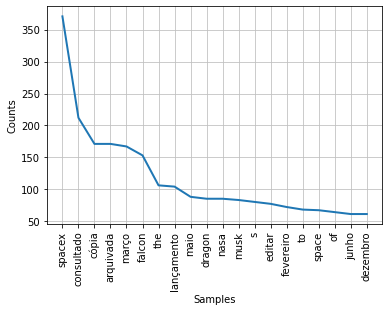

In [51]:
freq.plot(20, cumulative=False)

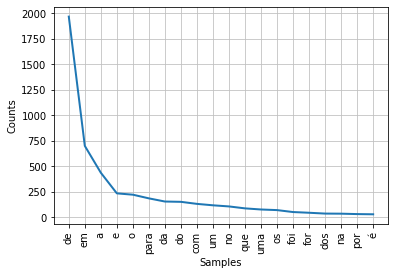

In [52]:
freq_stop.plot(20, cumulative=False)

In [57]:
# stemming e lemmatização: Normalização de textos

from nltk.stem.porter import *

stemmer = PorterStemmer()

palavras = ['saying', 'writing', 'running', 'going', 'worked','drink','drunk', 'working']

stem_palavras = []

for p in palavras:
  s_palavras = stemmer.stem(p)
  stem_palavras.append(s_palavras)

print(palavras)
print()
print(stem_palavras)

['saying', 'writing', 'running', 'going', 'worked', 'drink', 'drunk', 'working']

['say', 'write', 'run', 'go', 'work', 'drink', 'drunk', 'work']


In [58]:

from nltk.stem import SnowballStemmer

SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [67]:
#Lemmatização

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("running"))

# went: go

# saying: say

#rocks: rock

#running: run

running


In [68]:
import spacy

In [71]:
nlp = spacy.load('pt_core_news_sm')

In [95]:
frase = nlp(u'Estou assistindo aula da disciplina de DNEII!')

In [82]:
tokens = [token for token in frase]

In [83]:
print(frase)

Estou assistindo aula da disciplina de DNEII!


In [84]:
print(tokens)

[Estou, assistindo, aula, da, disciplina, de, DNEII, !]


In [85]:
frase.text.split()

['Estou', 'assistindo', 'aula', 'da', 'disciplina', 'de', 'DNEII!']

In [86]:
tokens2 = [token for token in frase if not token.is_punct]

In [87]:
print(tokens2)

[Estou, assistindo, aula, da, disciplina, de, DNEII]


In [92]:
print(tokens2[0].similarity(tokens2[1]))

-0.00874701701104641


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  """Entry point for launching an IPython kernel.


In [98]:
entidades = [entidade, entidade.label_ for entidade in frase.ents]

TypeError: ignored

In [97]:
print(entidades)

[]
